<a href="https://colab.research.google.com/github/Guillermo-rv/ML/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 1

In [ ]:
import pandas as pd

In [ ]:
# Reading the data
df_spotify = pd.read_csv("spotify_songs.csv")
# Check nulls -> Imputation!!
# Check type of data in features
# Transform features if neccessary
# Check outliers (next) -> IsolationForest!!

# Selecting the features that we need
df_spotify = df_spotify.select_dtypes(include="number")
df_spotify.describe()

# Get X/y
X = df_spotify.drop(columns=['like'])
y = df_spotify['like']

# OneHotEncoder
# pd.to_dummies()!!!

# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#print(y_train.value_counts())
#print(y_test.value_counts())

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Defining our Logistic Regression model
lgr = LogisticRegression()

# Fitting / training the model with training data
lgr.fit(X_train_scaled, y_train)

# Predicting the test (USE THE SCALED DATA!!)
y_train_predicted = lgr.predict(X_train_scaled)
y_test_predicted = lgr.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Accuracy Training #1: " + str(accuracy_score(y_train, y_train_predicted)))
print("Accuracy Training #2: " + str(lgr.score(X_train_scaled, y_train)))
print("Accuracy Test #1: " + str(accuracy_score(y_test, y_test_predicted)))
print("Accuracy Test #2: " + str(lgr.score(X_test_scaled, y_test)))

Accuracy Training #1: 0.9411764705882353
Accuracy Training #2: 0.9411764705882353
Accuracy Test #1: 0.9322033898305084
Accuracy Test #2: 0.9322033898305084


In [ ]:
# Probabilities of the last sample of my test set
lgr.predict_proba(X_test_scaled)[-1]
y_test_predicted[-1]

# EXAMPLE CHANGING THRESHOLD
probabilities_test = pd.DataFrame(lgr.predict_proba(X_test_scaled))
probabilities_test = probabilities_test.rename(columns={0:'dislike'})
import numpy as np
np.where(probabilities_test['dislike']>0.65, "yes", "no")

array(['no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes'], dtype='<U3')

In [ ]:
# DECISION FUNCTION
my_confidence_score_last_test = lgr.decision_function(X_test_scaled)[-1]
import math
my_probability_from_confidence = 1 / (1+math.e**(my_confidence_score_last_test)) # SIGMOID FUNCTION with our confidence score

In [ ]:
# ROC AUC SCORE
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, lgr.decision_function(X_test_scaled))) # Option #2
print(roc_auc_score(y_test, lgr.predict_proba(X_test_scaled)[:, 1])) # Juanjo's version

0.9781609195402299
0.9781609195402299


## Exercise 2

In [ ]:
# CHANGING THE C
lgr_c = LogisticRegression(C=0.001)
# Like in support vector machines, smaller values of C specify stronger regularization.
lgr_c.fit(X_train_scaled, y_train)
print("Accuracy Training: " + str(lgr_c.score(X_train_scaled, y_train)))
print("Accuracy Test: " + str(lgr_c.score(X_test_scaled, y_test)))

Accuracy Training: 0.75
Accuracy Test: 0.8135593220338984


In [ ]:
# CHANGING THE PENALTY
lgr_p = LogisticRegression(penalty="l1", solver="liblinear", C=1)
# Like in support vector machines, smaller values of C specify stronger regularization.
lgr_p.fit(X_train_scaled, y_train)
print("Accuracy Training: " + str(lgr_p.score(X_train_scaled, y_train)))
print("Accuracy Test: " + str(lgr_p.score(X_test_scaled, y_test)))

Accuracy Training: 0.9338235294117647
Accuracy Test: 0.9491525423728814


In [ ]:
feature_importance = np.abs(lgr_p.coef_[0]) # Theta

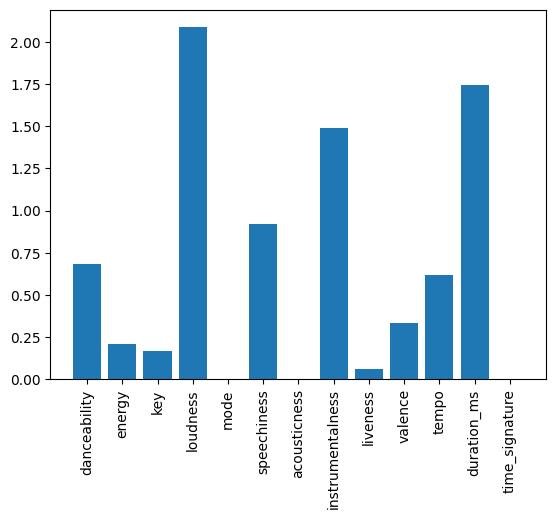

In [ ]:
import matplotlib.pyplot as plt
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=90) # To be able to see the columns names
plt.show()

## Exercise 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Step 1: My grid of parameters
my_grid = {
    'n_neighbors' : [4, 5, 6],
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2]
}

# Step 2: Define the estimator
knn = KNeighborsClassifier()

# Step 3: Define the GridSearchCV
knn_grid = GridSearchCV(knn, my_grid)

# Step 4: Fitting the GridSearchCV
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
print("Best estimator: " + str(knn_grid.best_estimator_))

Best estimator: KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')


In [ ]:
print("Best params: " + str(knn_grid.best_params_))

Best params: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [ ]:
print("Best score: " + str(knn_grid.best_score_)) # Validation set!!

Best score: 0.8677248677248677


In [ ]:
print("Score training: " + str(knn_grid.score(X_train_scaled, y_train))) # Training set!!

Score training: 1.0


In [ ]:
print("Score test: " + str(knn_grid.score(X_test_scaled, y_test)))

Score test: 0.9322033898305084


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_test_predicted = knn_grid.predict(X_test_scaled)
confusion_matrix(y_test, y_test_predicted)

array([[28,  2],
       [ 2, 27]])

In [ ]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.93      0.93      0.93        29

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



# Session 2

## Exercise 1

In [ ]:
# Step 1: My grid of parameters
my_grid = {
    'C' : [0.01, 0.1, 1, 10],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmo'],
    'gamma' : ['auto', 'scale', 0.1, 1],
    'degree' : [2, 3, 4]
}

# Step 2: Define the estimator
from sklearn.svm import SVC
svc = SVC()

# Step 3: Define the GridSearchCV
svc_grid = GridSearchCV(svc, my_grid)

# Step 4: Fitting the GridSearchCV
svc_grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['auto', 'scale', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmo']})

In [ ]:
print("Best params: " + str(svc_grid.best_params_))
print("GridSearchCV score: " + str(svc_grid.best_score_))

Best params: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
GridSearchCV score: 0.8679894179894181


In [ ]:
print("Training score: " + str(svc_grid.score(X_train_scaled, y_train)))

Training score: 0.9411764705882353


In [ ]:
print("Test score: " + str(svc_grid.score(X_test_scaled, y_test)))

Test score: 0.9322033898305084


In [ ]:
!pip install import-ipynb
import import_ipynb
from google.colab import drive
drive.mount('/content/drive')

  Using cached import_ipynb-0.1.4-py3-none-any.whl (4.1 kB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
Mounted at /content/drive


In [ ]:
# from s00_useful_functions_supervised import * # SPYDER, PYCHARM, ...

In [ ]:
from drive.MyDrive.Colab_Notebooks.IntakeFebruary2024_ML_exercises.s00_useful_functions_supervised import * # Google Colab CHANGE IT TO YOUR PATH (without spaces)!!

importing Jupyter notebook from /content/drive/MyDrive/Colab_Notebooks/IntakeFebruary2024_ML_exercises/s00_useful_functions_supervised.ipynb


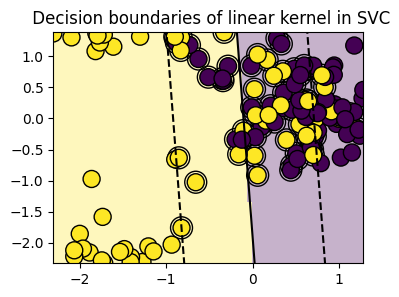

In [ ]:
plot_SVC_decision_boundary("linear", X_train, y_train, opt_c=1, pca=False, col1="danceability", col2="energy")

## Exercise 2

In [ ]:
# Remove time_signature from the original data
X_train_before_scale = X_train.drop(columns=['time_signature'])
X_train_before_encoding = X_train[['time_signature']]
X_test_before_scale = X_test.drop(columns=['time_signature'])
X_test_before_encoding = X_test[['time_signature']]

# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train_before_scale)
X_train_scaled = scaler.transform(X_train_before_scale)
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train_before_scale.index) # optional - transforming to a DF with indexes
X_train_scaled_df.columns = X_train_before_scale.columns # optional - columns names

X_test_scaled = scaler.transform(X_test_before_scale)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test_before_scale.index) # optional
X_test_scaled_df.columns = X_test_before_scale.columns # optional

# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output=False) # to avoid the sparse matrix
onehot.fit(X_train_before_encoding)
X_train_onehot = onehot.transform(X_train_before_encoding)
X_test_onehot = onehot.transform(X_test_before_encoding)

# Creating the columns names of onehotencoder (cat_1, cat_3,...)

In [ ]:
# Traditional for
'''
my_arr = []
for i in onehot.categories_[0]:
  my_arr.append('cat_' + str(i))
'''

# one-line for
my_arr = ['cat_' + str(i) for i in onehot.categories_[0]]
X_train_scaled_df[my_arr] = X_train_onehot # Adding the onehot columns to the scaled dataframe
X_test_scaled_df[my_arr] = X_test_onehot

In [ ]:
svc = SVC(**svc_grid.best_params_) # Using the same parameters as the best one from the GridSearchCV
svc.fit(X_train_scaled_df, y_train)

SVC(C=1, degree=2, gamma='auto', kernel='linear')

In [ ]:
svc.score(X_train_scaled_df, y_train)

0.9411764705882353

In [ ]:
svc.score(X_test_scaled_df, y_test)

0.9491525423728814

## Exercise 3

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = [50, 20], max_iter=500)
arr_cross = cross_val_score(mlp, X_train_scaled, y_train)

In [ ]:
arr_cross.mean()

0.838095238095238

In [ ]:
arr_cross.std()

0.10120076373337761

In [ ]:
mlp.fit(X_train_scaled, y_train)

In [ ]:
# OPTION 1 to get the accuracy
from sklearn.metrics import accuracy_score
y_test_predicted = mlp.predict(X_test_scaled)
accuracy_score(y_test, y_test_predicted)

0.9322033898305084

In [ ]:
# OPTION 2 to get the accuracy
mlp.score(X_test_scaled, y_test)

0.9322033898305084

# Session 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
my_grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [3, 4, 5, 7, 10, None]
}

dt = DecisionTreeClassifier(random_state=37)

dt_grid = GridSearchCV(dt, my_grid)

dt_grid.fit(X_train, y_train)
print("Best parameters: " + str(dt_grid.best_params_))
print("Training score: " + str(dt_grid.score(X_train, y_train)))
print("Test score: " + str(dt_grid.score(X_test, y_test)))
# IT'S OVERFITTED!! / Try RF or XGB / CHANGE MORE PARAMETERS OF DT

Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Training score: 0.9485294117647058
Test score: 0.9152542372881356


In [ ]:
## Answering question a.1.
dt_noScaling = DecisionTreeClassifier(random_state = 42)
dt_noScaling.fit(X_train, y_train)
print("Score of DT without scaling - TRAINING: " + str(dt_noScaling.score(X_train, y_train)))
print("Score of DT without scaling - TEST: " + str(dt_noScaling.score(X_test, y_test)))

dt_scaling = DecisionTreeClassifier(random_state = 42)
dt_scaling.fit(X_train_scaled, y_train)
print("Score of DT with scaling - TRAINING: " + str(dt_scaling.score(X_train_scaled, y_train)))
print("Score of DT with scaling - TEST: " + str(dt_scaling.score(X_test_scaled, y_test)))

Score of DT without scaling - TRAINING: 1.0
Score of DT without scaling - TEST: 0.8813559322033898
Score of DT with scaling - TRAINING: 1.0
Score of DT with scaling - TEST: 0.8813559322033898


In [ ]:
## Answering question a.2
!pip install import-ipynb
import import_ipynb
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from drive.MyDrive.Colab_Notebooks.IntakeFebruary2024_ML_exercises.s00_useful_functions_supervised import * # Google Colab CHANGE IT TO YOUR PATH (without spaces)!!

importing Jupyter notebook from /content/drive/MyDrive/Colab_Notebooks/IntakeFebruary2024_ML_exercises/s00_useful_functions_supervised.ipynb


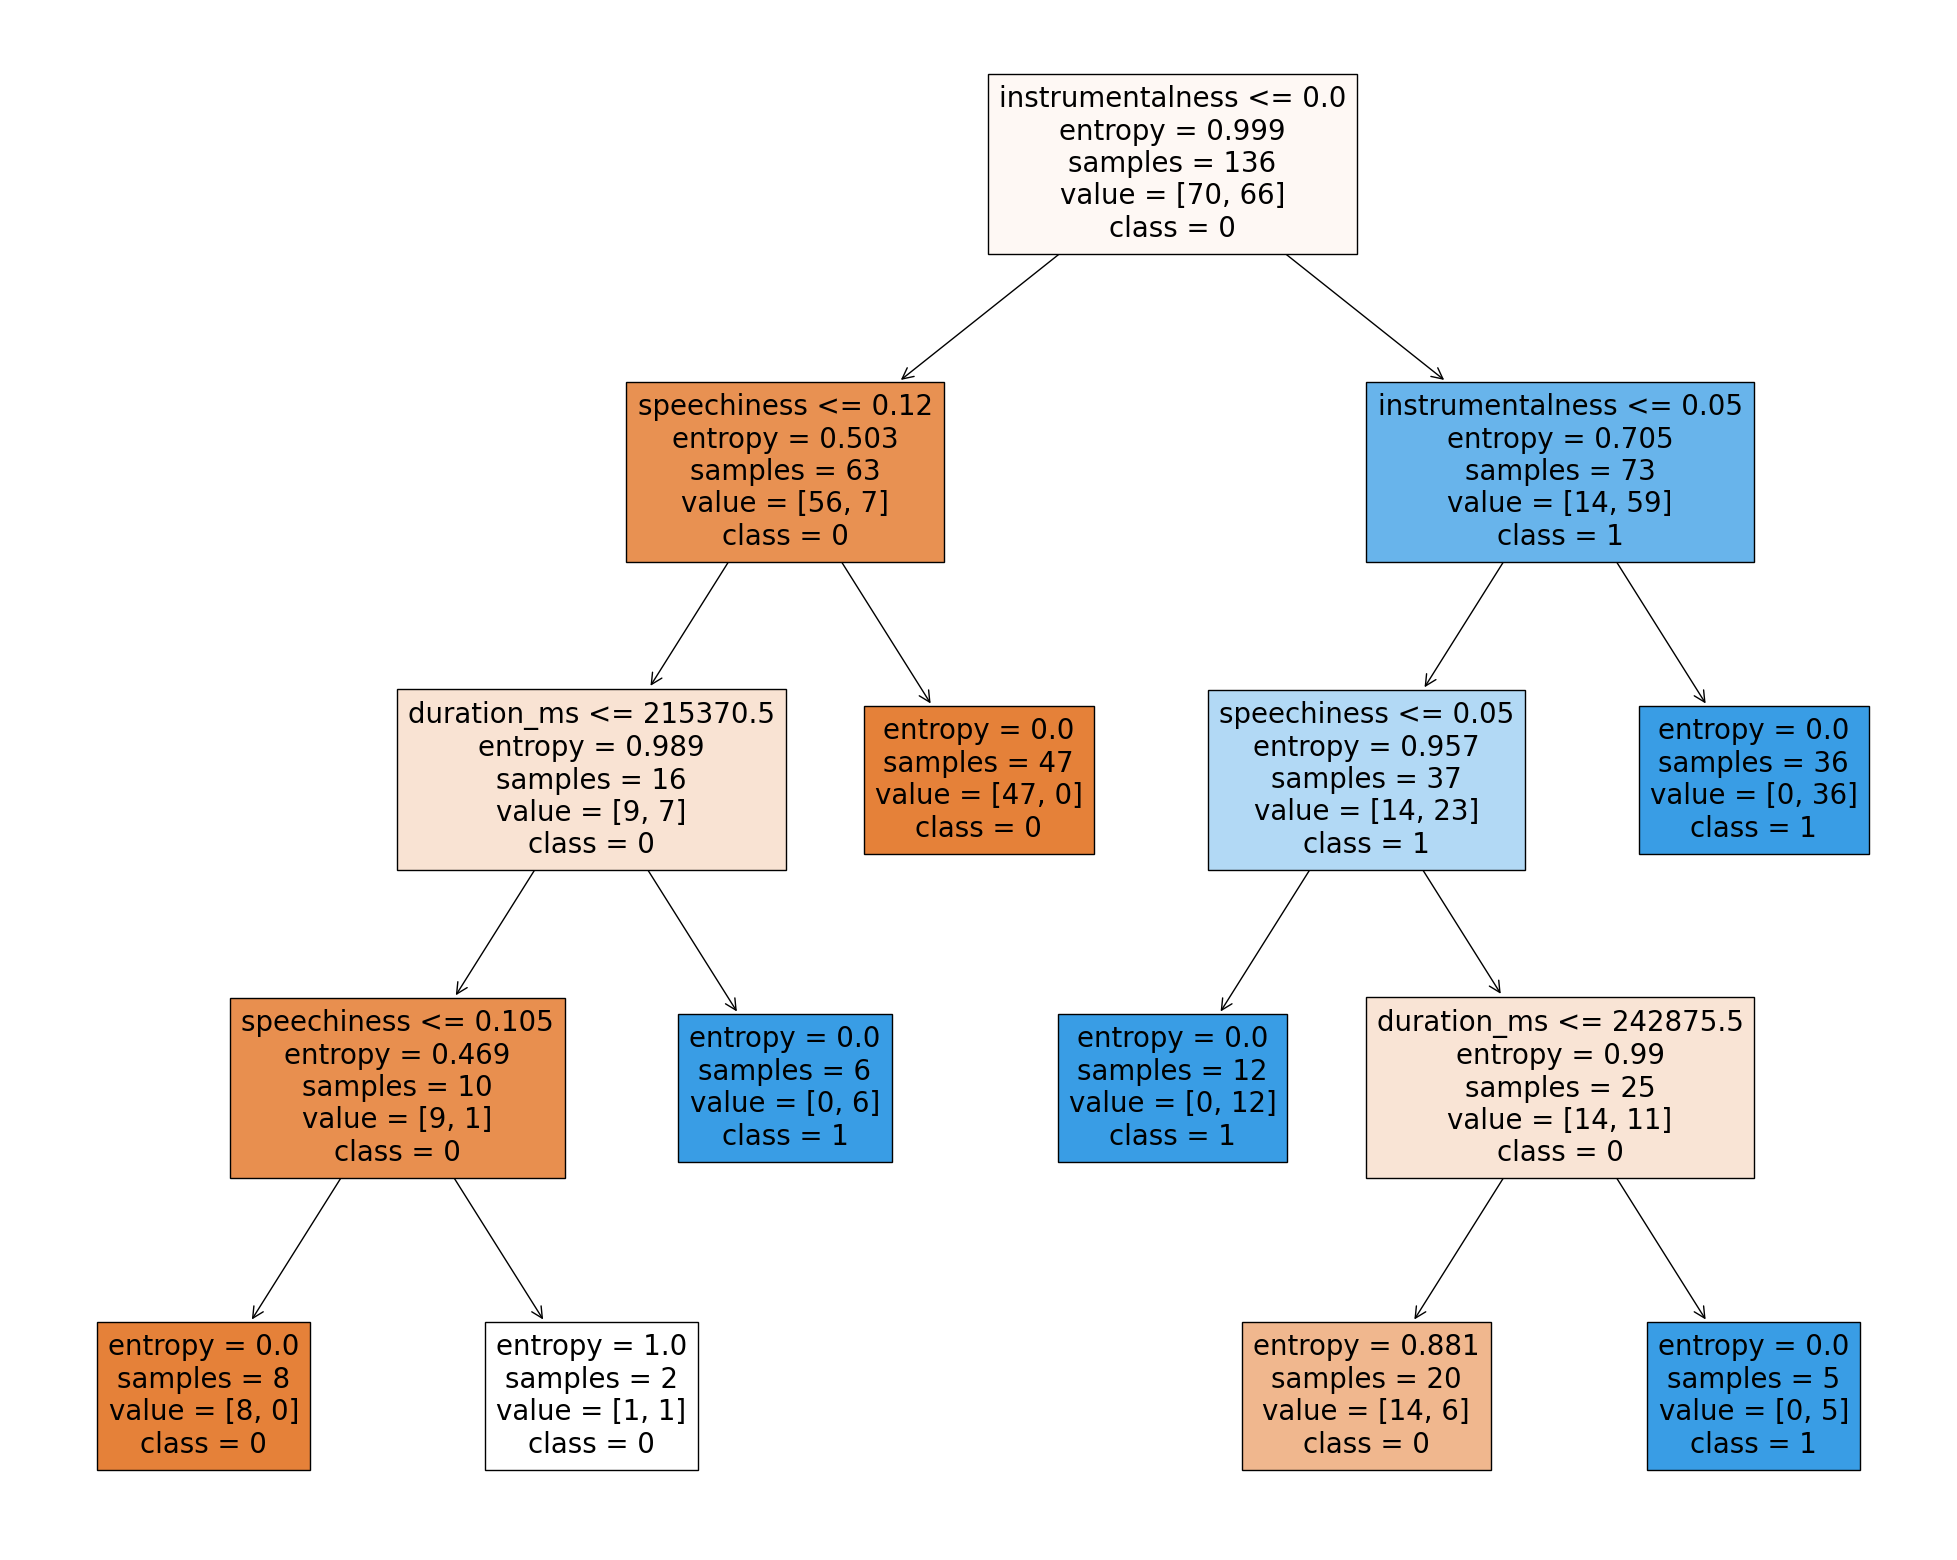

In [ ]:
plot_decision_tree(dt_grid.best_estimator_, X_train.columns) # Question a.2.

In [ ]:
confusion_matrix(y_train, dt_grid.predict(X_train))

array([[70,  0],
       [ 7, 59]])

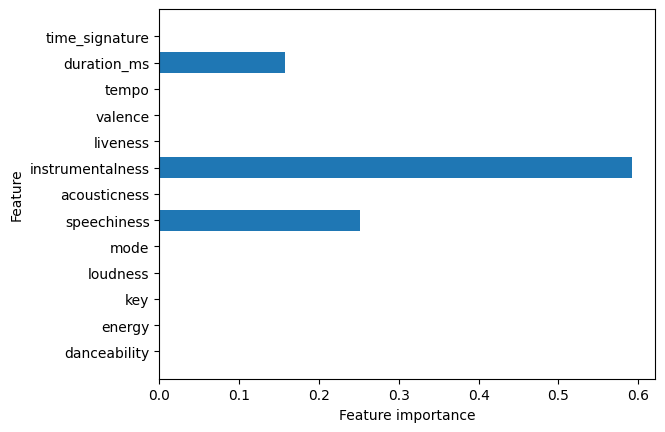

In [ ]:
# Question a.4
plot_feature_importances_tree(dt_grid.best_estimator_, X_train)

In [ ]:
# RANDOM FOREST WITH DEFAULT PARAMETERS
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Score TRAINING : " + str(rf.score(X_train, y_train)))
print("Score TEST: " + str(rf.score(X_test, y_test)))

# GridSearchCV of RF!! Tomorrow
# If you don't make it -> XGB (GridSearchCV)

Score TRAINING : 1.0
Score TEST: 0.9322033898305084


In [ ]:
# RANDOM FOREST WITH GridSearchCV
rf = RandomForestClassifier(n_jobs=-1)

# max_features
import math
sqrt_cols = int(math.sqrt(X_train.shape[1])) # integer value of sqrt

my_grid_rf = {
    'n_estimators': [150, 300], #500],
    'criterion' : ['gini','entropy'],
    'max_features' : [sqrt_cols, sqrt_cols+1, sqrt_cols-1], # sqrt, sqrt-1, sqrt+1
    'max_depth' : [3, 4] # Small values!!
}

clf = GridSearchCV(rf, my_grid_rf)
clf.fit(X_train, y_train)
print("Best estimator: " + str(clf.best_estimator_))
print("Best score CV: " + str(clf.best_score_))
print("Score training: " + str(clf.score(X_train, y_train)))
print("Score test: " + str(clf.score(X_test, y_test)))

Best estimator: RandomForestClassifier(max_depth=4, max_features=3, n_estimators=300, n_jobs=-1)
Best score CV: 0.9190476190476191
Score training: 0.9779411764705882
Score test: 0.9322033898305084


In [ ]:
from sklearn.metrics import confusion_matrix
y_train_pred = clf.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[69,  1],
       [ 2, 64]])

In [ ]:
y_test_pred = clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[27,  3],
       [ 1, 28]])

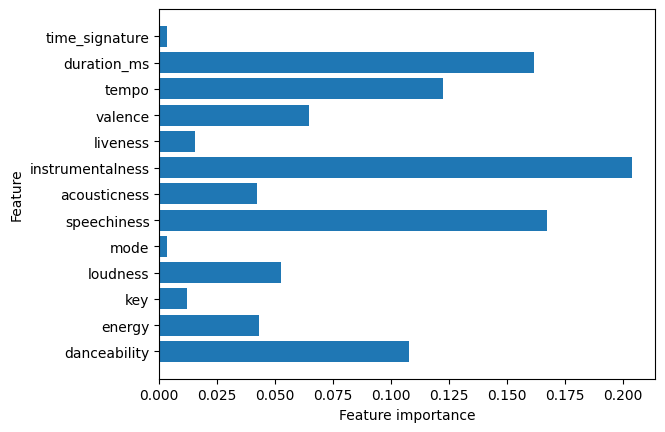

In [ ]:
# Solution b.1 # n_estimators=1, bootstrap=False
# Solution b.2 # no adding randomness with the number of features
# Solution b.3
plot_feature_importances_tree(clf.best_estimator_, X_train)

In [ ]:
## XGBoost
from xgboost import XGBClassifier

In [ ]:
# Step 1: Parameters
param_dist = {
    'n_estimators': [50, 70], #100, 150],
    'learning_rate': [0.0001, 0.001], #0.01, 0.1, 1],  # x10 # 0.001, 0.0001, 10, 100
    'max_depth': [2, 3, 4, 5]
}

# Step 2: XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Step 3: GridSearch
grid_search_xg = GridSearchCV(xgb_classifier, param_dist)
grid_search_xg.fit(X_train, y_train)
print("Best Parameters: ", grid_search_xg.best_params_)
print("Best Estimator: ", grid_search_xg.best_estimator_)
print("Best Score: ", grid_search_xg.best_score_)
print("Train Accuracy: " + str(grid_search_xg.score(X_train, y_train)))

# Step 4: Test data
test_accuracy = grid_search_xg.score(X_test, y_test)
print("Test Accuracy: " + str(test_accuracy))

Best Parameters:  {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70}
Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Best Score:  0.7645502645502645
Train Accuracy: 0.9117647058823529
Test Accuracy: 0.9322033898305084


In [ ]:
# More than 0.87, 0.88
16:40